In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np

In [3]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
print("Showing columns with more than 5% missing values:")

sum_of_na = df.isna().sum()
na_in_percent = (sum_of_na / len(df)) * 100
five_percent = na_in_percent[na_in_percent > 5]
print(five_percent)

Showing columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [5]:
print("Initialize key columns to clean")
columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

Initialize key columns to clean


In [7]:
print("Remove negative values and replace with NaN")

for col in columns:
    df[col] = df[col].where(
        df[col] >= 0, np.nan
    )  # Replacing happens when condition resolves to false

print(df[columns].head())

Remove negative values and replace with NaN
   GHI  DNI  DHI  ModA  ModB   WS  WSgust
0  NaN  0.0  0.0   0.0   0.0  0.9     1.1
1  NaN  0.0  0.0   0.0   0.0  1.1     1.6
2  NaN  0.0  0.0   0.0   0.0  1.2     1.4
3  NaN  0.0  0.0   0.0   0.0  1.2     1.6
4  NaN  0.0  0.0   0.0   0.0  1.3     1.6


In [8]:
print("Impute missing values with column mean")

for col in columns:
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)

print(df[columns].head())

Impute missing values with column mean
          GHI  DNI  DHI  ModA  ModB   WS  WSgust
0  454.081218  0.0  0.0   0.0   0.0  0.9     1.1
1  454.081218  0.0  0.0   0.0   0.0  1.1     1.6
2  454.081218  0.0  0.0   0.0   0.0  1.2     1.4
3  454.081218  0.0  0.0   0.0   0.0  1.2     1.6
4  454.081218  0.0  0.0   0.0   0.0  1.3     1.6


In [9]:
print("Checking for Outliers using Z-Score and flagging them:")

columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_score = (df[columns] - df[columns].mean()) / df[columns].std()
df["is_outlier"] = (abs(z_score) > 3).any(axis=1)
print(df[["is_outlier"]].head())

Checking for Outliers using Z-Score and flagging them:
   is_outlier
0       False
1       False
2       False
3       False
4       False


In [10]:
print("Drop columns with more than 80% missing values")

df_clean = df.copy()
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"], errors="coerce")
all_columns = list(df_clean.columns)

for col in all_columns:
    na_percentage = (df_clean[col].isna().sum() / len(df)) * 100

    if na_percentage > 80:
        df_clean.drop(columns=[col], inplace=True)

df_clean.isna().sum()

df_clean.to_csv("../data/togo_clean.csv", index=False)

Drop columns with more than 80% missing values


Line Chart of GHI, DNI, DHI, Tamb over Time


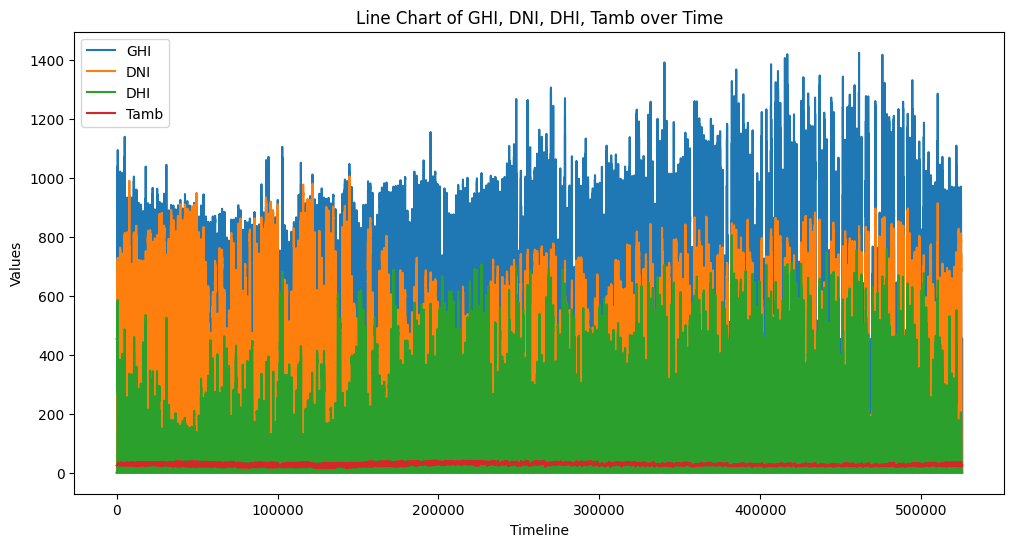

In [11]:
print("Line Chart of GHI, DNI, DHI, Tamb over Time")

columns_to_plot = ["GHI", "DNI", "DHI", "Tamb"]
df_clean[columns_to_plot].plot(figsize=(12, 6))
plt.xlabel("Timeline")
plt.ylabel("Values")
plt.title("Line Chart of GHI, DNI, DHI, Tamb over Time")
plt.legend(columns_to_plot)
plt.show()

Bar Chart of Average ModA & ModB Pre/Post Cleaning
                  ModA        ModB
is_outlier                        
False       218.603050  212.258082
True        626.687069  607.851827


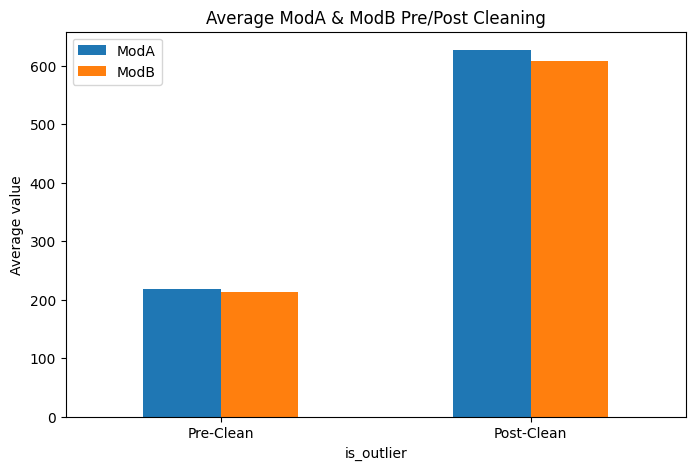

In [12]:
print("Bar Chart of Average ModA & ModB Pre/Post Cleaning")

grouped = df_clean.groupby("is_outlier")[["ModA", "ModB"]].mean()
print(grouped)
grouped.plot(kind="bar", figsize=(8, 5))
plt.ylabel("Average value")
plt.title(
    "Average ModA & ModB Pre/Post Cleaning"
)  # Pre clean is False , Post clean is True
plt.xticks([0, 1], ["Pre-Clean", "Post-Clean"], rotation=0)
plt.show()

Heatmap of Correlation


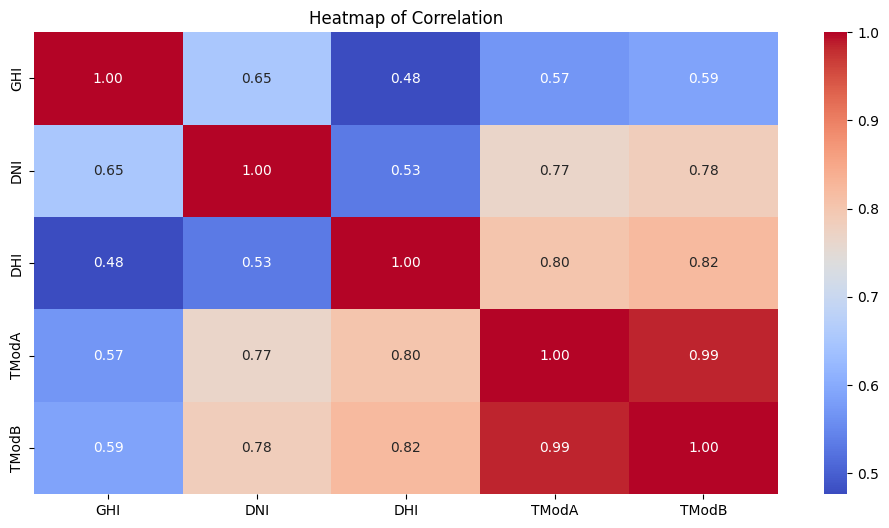

In [13]:
print("Heatmap of Correlation")
columns_to_plot = ["GHI", "DNI", "DHI", "TModA", "TModB"]

corr_matrix = df_clean[columns_to_plot].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Correlation")
plt.show()

Scatter Plot of WS, WSgust, WD vs GHI


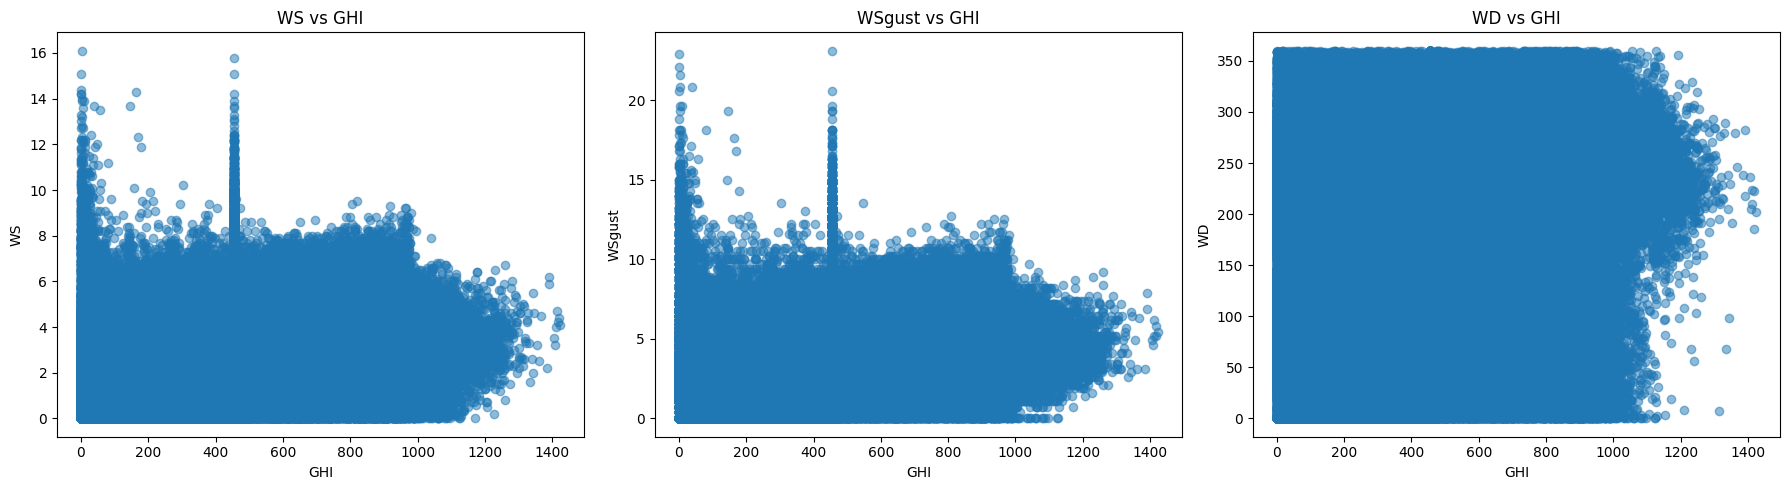

In [14]:
print("Scatter Plot of WS, WSgust, WD vs GHI")
columns_to_plot = ["WS", "WSgust", "WD"]
target = "GHI"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(columns_to_plot):
    axes[i].scatter(df_clean[target], df_clean[col], alpha=0.5)
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)
    axes[i].set_title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

Scatter Plot of RH vs GHI


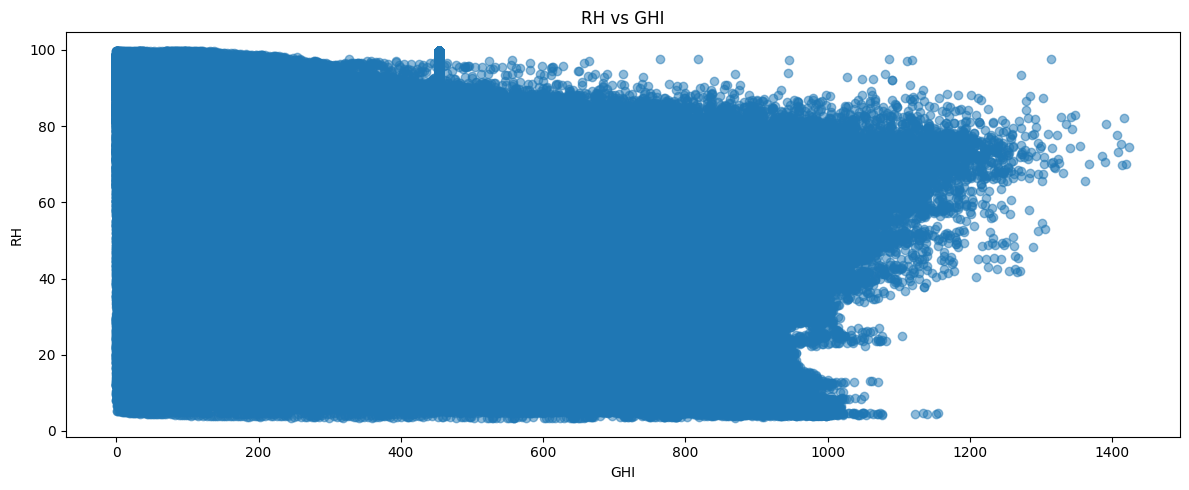

In [15]:
print("Scatter Plot of RH vs GHI")

columns_to_plot = ["RH"]
target = "GHI"

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

for i, col in enumerate(columns_to_plot):
    axes.scatter(df_clean[target], df_clean[col], alpha=0.5)
    axes.set_xlabel(target)
    axes.set_ylabel(col)
    axes.set_title(f"{col} vs {target}")

plt.tight_layout()
plt.show()

Wind Speed and Wind Direction plot


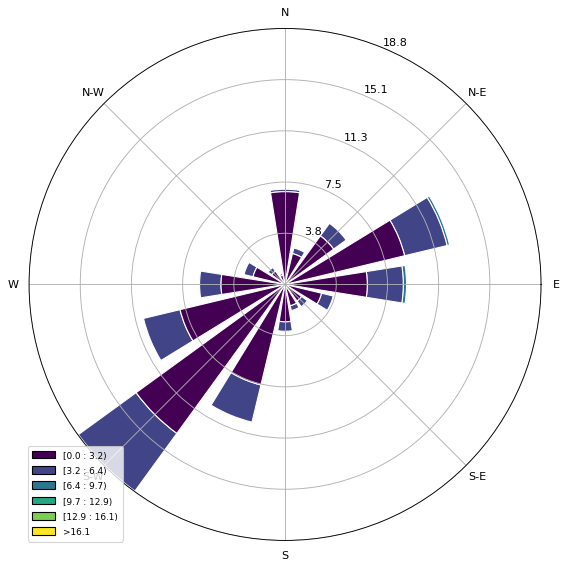

In [16]:
print("Wind Speed and Wind Direction plot")

ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.show()

Histogram of GHI and DNI


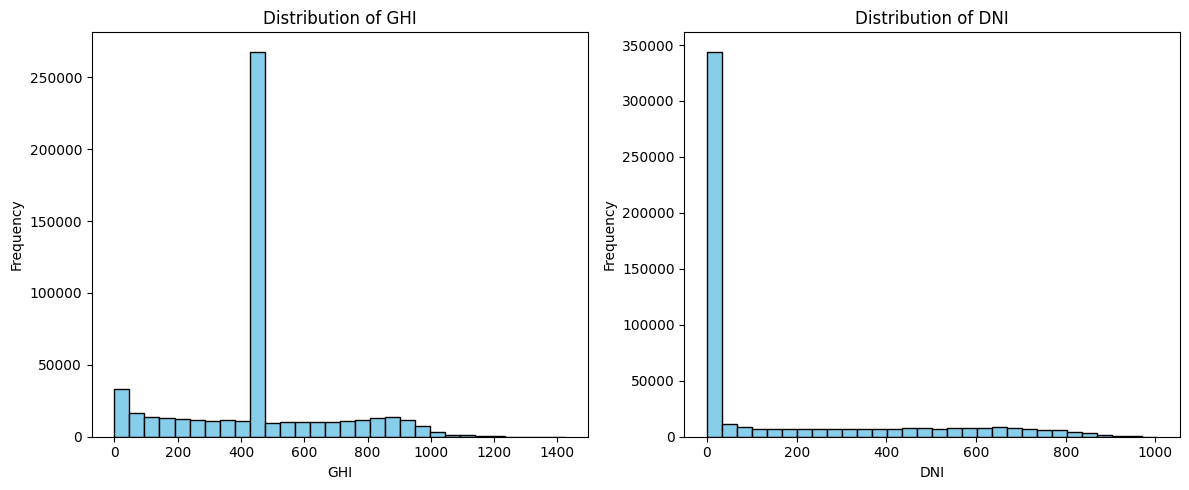

In [17]:
print("Histogram of GHI and DNI")

columns_to_plot = ["GHI", "DNI"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(columns_to_plot):
    axes[i].hist(df_clean[col].dropna(), bins=30, color="skyblue", edgecolor="black")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Temperature Analysis


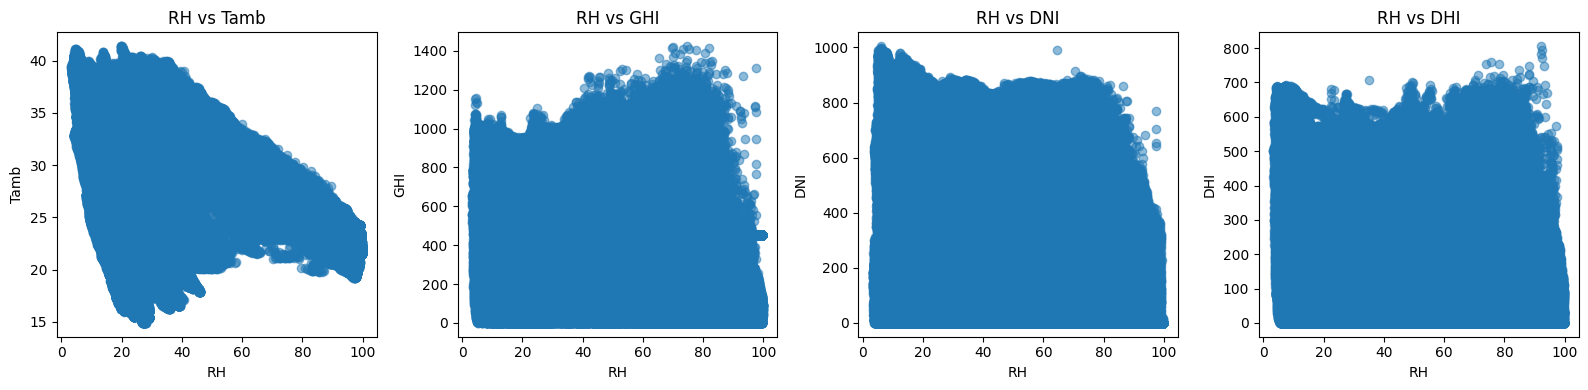

In [18]:
print("Temperature Analysis")

variables = ["Tamb", "GHI", "DNI", "DHI"]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, var in enumerate(variables):
    axes[i].scatter(df_clean["RH"], df_clean[var], alpha=0.5)
    axes[i].set_xlabel("RH")
    axes[i].set_ylabel(var)
    axes[i].set_title(f"RH vs {var}")

plt.tight_layout()
plt.show()

Bubble Chart of GHI vs Tamb with RH as bubble size


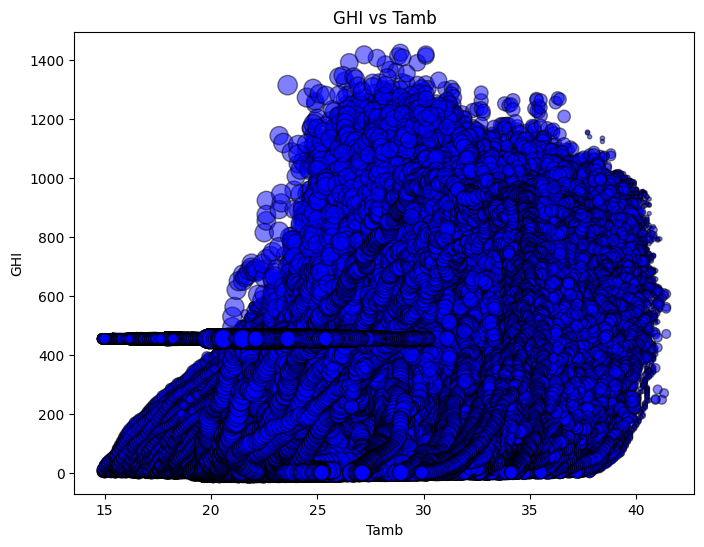

In [19]:
print("Bubble Chart of GHI vs Tamb with RH as bubble size")

plt.figure(figsize=(8, 6))
plt.scatter(
    df["Tamb"],
    df["GHI"],
    s=df["RH"] * 2,
    alpha=0.5,
    c="blue",
    edgecolor="k",
)
plt.xlabel("Tamb")
plt.ylabel("GHI")
plt.title("GHI vs Tamb")
plt.show()